In [1]:
import pandas as pd
import numpy as np
import os, sys, subprocess
import h5py
import json
import matplotlib.pyplot as plt

In [2]:
#import data from Sastry et. al. 
DATA_DIR = '../dataframes/'

DF_prest = pd.concat([pd.read_csv(DATA_DIR+'DF_prest_features_1.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_2.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_3.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_4.csv',index_col=0)])
print ('Number of peptides:', len(DF_prest))


Number of peptides: 45206


In [3]:
DF_prest.head(5)

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len,true_nt_seq,AAA,AAT,AAC,...,disembl_HOTLOOPS_frac,ronn_avg,ronn_results,ronn_frac,disopred_results,disopred_avg,disopred_pb_results,disopred_pb_avg,disopred_frac,disopred_pb_frac
0,140095,G3V3N0,4.3075,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139,ATTATGACAGCTCCCTCCAGTTTTGAGCAGTTTAAAGTGGCAATGA...,0.057554,0.043165,0.021583,...,0.410072,0.495827,imtapssfeqfkvamnylqlynvpdclediqDADCSSSKCSSSASS...,0.482014,ImtapssfeqfkvamnylqlynvpdclediqdadcsSSKCSSSASS...,0.387050,-...................................^^^^^^^^^^...,0.317770,0.388489,0.359712
1,140099,G3V537,2.9154,TYYAWKHELLGSGTCPALPPREVLGMEELEKLPEEQVAEEELECSA...,GACAAGCTTGCGGCCGCAACCTACTATGCCTGGAAGCATGAGCTGC...,144,ACCTACTATGCCTGGAAGCATGAGCTGCTGGGCTCTGGCACCTGCC...,0.006944,0.013889,0.013889,...,0.388889,0.488125,tyyawkhellGSGTcPALPPREVLGMEELEKLPEEQVAEEELECSa...,0.493056,tyyawkhellgsgtCPALPPREVLGMEELEKLPEEQVAEEELECSA...,0.421597,..............^^^^^^--^^^^^^^^^^^^^^^^^^^-^^^^...,0.352917,0.465278,0.423611
2,140225,P12724,1.4877,SLHARPPQFTRAQWFAIQHISLNPPRCTIAMRAINNYRWRCKNQNT...,GACAAGCTTGCGGCCGCATCACTCCATGCCAGACCCCCACAGTTTA...,136,TCACTCCATGCCAGACCCCCACAGTTTACGAGGGCTCAGTGGTTTG...,0.007353,0.051471,0.058824,...,0.338235,0.368750,SLharppqftraqwfaiqhislnpprctiamrainnyrwrcknqnt...,0.058824,slharppqftraqwfaiqhislnpprctiamrainnyrwrcknqnt...,0.034338,.................................................,0.000000,0.000000,0.000000
3,140235,H0YH02,6.7224,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,GACAAGCTTGCGGCCGCAGCGAGAGCATTAAATGAAAGCAAAAGAG...,123,GCGAGAGCATTAAATGAAAGCAAAAGAGTTAATAATGGCAACACGG...,0.040650,0.056911,0.040650,...,0.552846,0.571382,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,0.536585,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,0.425366,^^^^^^^^^^^^^^^-^---^-^^^^^^^^^^^^^--^^^^^^^^^...,0.295122,0.430894,0.373984
4,140309,F5GYC5,3.3848,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,GACAAGCTTGCGGCCGCACATCGGAAAGAGCCTGGGGCAAGGCTGG...,124,CATCGGAAAGAGCCTGGGGCAAGGCTGGAGGCCACAAGAGGAGCTG...,0.032258,0.008065,0.008065,...,0.274194,0.556613,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,0.620968,HRKEPGARLEATRGAARPHKQGTkpmitrpsvsqlgegkcpssqhl...,0.236613,^^^^^^^^^^^^^^^^^^^^^^^^.........................,0.185726,0.201613,0.209677


In [4]:
aa_features = ['list_comp_A','list_comp_R','list_comp_N',
               'list_comp_D','list_comp_C','list_comp_Q','list_comp_E','list_comp_G',
               'list_comp_H','list_comp_I','list_comp_L','list_comp_K','list_comp_M',
               'list_comp_F','list_comp_P','list_comp_S','list_comp_T','list_comp_W',
               'list_comp_Y','list_comp_V',
               # Amino acid types
               'frac_aliphatic', 'frac_uncharged_polar', 'frac_polar',
               'frac_hydrophobic', 'frac_positive', 'frac_sulfur', 'frac_negative', 'frac_amide',
               'frac_alcohol']

disorder_features = ['disembl_COILS_frac','disembl_REM465_frac','disembl_HOTLOOPS_frac','ronn_avg','ronn_frac',
                    'disopred_avg','disopred_pb_avg','disopred_frac','disopred_pb_frac']

                    
phys_features = ['aa_len',                                        
                # Physical properties
                 'bio_pI','bio_mW','bio_aromaticity','bio_instability','bio_gravy','abs_avg_charge','abs_charge',
                 'avg_charge']
                    
rna_features = ['AAA','AAC','AAT','AAG','ACA','ACC','ACT','ACG','ATA','ATC','ATT','ATG','AGA','AGC','AGT',
                'AGG','CAA','CAC','CAT','CAG','CCA','CCC','CCT','CCG','CTA','CTC','CTT','CTG','CGA','CGC',
                'CGT','CGG','TAA','TAC','TAT','TAG','TCA','TCC','TCT','TCG','TTA','TTC','TTT','TTG','TGA',
                'TGC','TGT','TGG','GAA','GAC','GAT','GAG','GCA','GCC','GCT','GCG','GTA','GTC','GTT','GTG',
                'GGA','GGC','GGT','GGG',
                'GC_content','list_nuc_A','list_nuc_C','list_nuc_G','list_nuc_T',
                'GC30',
                # SD sequences
                'sd_like_fwd','sd_like_fwd_frac','sd_like_rev','sd_like_rev_frac','sd_seq_fwd',
                'sd_seq_fwd_frac','sd_seq_rev','sd_seq_rev_frac',
                # RNA folding
                'RNA_folding_energy','RNA_40_energy','tAI']
                    
ss_features = ['acc20_mean','ss_helix', 'ss_ext', 'ss_c', 'ss8_helix', 'ss8_ext', 'ss8_turn', 'ss8_helix3',
               'ss8_pi_helix', 'ss8_bridge', 'ss8_bend', 'ss8_coil', 'acc_frac',
               'in_gravy','out_gravy', 'acc_hydrophilic_in','acc_hydrophilic_out',
               'acc_hydrophobic_in','acc_hydrophobic_out']

list_of_features = aa_features+disorder_features+phys_features+rna_features+ss_features

# Do this with the top 11 features according to Pearson Correlation instead

In [5]:
# list_of_features = ['frac_polar', 'ss8_ext', 'ss_ext', 'list_comp_Y',
#        'frac_uncharged_polar', 'list_comp_L', 'ss8_helix', 'ss_helix', 'in_gravy', 'frac_hydrophobic',
#        'bio_pI']

In [6]:
df_features= pd.DataFrame()
df_features['prest_id'] = DF_prest['prest_id']
df_features['conc_cf'] = DF_prest['conc_cf']
df_features[list_of_features] = DF_prest[list_of_features]
df_features.head()

,prest_id,conc_cf,list_comp_A,list_comp_R,list_comp_N,list_comp_D,list_comp_C,list_comp_Q,list_comp_E,list_comp_G,...,ss8_bridge,ss8_bend,ss8_coil,acc_frac,in_gravy,out_gravy,acc_hydrophilic_in,acc_hydrophilic_out,acc_hydrophobic_in,acc_hydrophobic_out
0,140095,4.3075,0.057554,0.057554,0.064748,0.057554,0.050360,0.035971,0.071942,0.043165,...,0.000000,0.014388,0.546763,0.625899,0.599281,-1.199281,0.057554,0.438849,0.294964,0.115108
1,140099,2.9154,0.111111,0.069444,0.027778,0.000000,0.027778,0.020833,0.118056,0.076389,...,0.000000,0.013889,0.423611,0.638889,0.378472,-0.747917,0.069444,0.291667,0.263889,0.215278
2,140225,1.4877,0.066176,0.139706,0.110294,0.044118,0.058824,0.044118,0.000000,0.022059,...,0.022059,0.117647,0.235294,0.588235,0.360294,-0.994853,0.066176,0.323529,0.323529,0.176471
3,140235,6.7224,0.089431,0.056911,0.097561,0.073171,0.024390,0.056911,0.065041,0.048780,...,0.000000,0.008130,0.430894,0.674797,0.312195,-1.328455,0.073171,0.439024,0.235772,0.162602
4,140309,3.3848,0.072581,0.072581,0.016129,0.000000,0.072581,0.080645,0.080645,0.064516,...,0.000000,0.008065,0.395161,0.685484,0.572581,-1.391129,0.048387,0.379032,0.258065,0.193548


# One hot encoding of AA sequence

In [7]:
# list of amino acid single letter abbreviations from https://en.wikipedia.org/wiki/Amino_acid
#aa_list = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

# amino acid list in order of hydropathy score from https://en.wikipedia.org/wiki/Hydrophilicity_plot
aa_list = ['I', 'V', 'L', 'F', 'C', 'M', 'A', 'G', 'T', 'S', 'W', 'Y', 'P', 'H', 'E', 'Q', 'D', 'N', 'K', 'R']

Make a dictionary for the encoding (with abbreviations sorted in alpabetical order)

In [8]:
# create a dictionary
features = {}
for idx, aa in enumerate(aa_list): 
    one_hot = np.zeros(len(aa_list))
    one_hot[idx] = 1
    features[aa] = list(one_hot)  

In order to avoid the need to pad the data later we will make all one hot encodings the same length

In [9]:
max(DF_prest['aa_len'])

149

In [10]:
def aa_to_one_hot_matrix(aa_seq):
    
    one_hot_matrix = np.zeros([149, 20]) # maximum aa_seq length X number of amino acids 
    for idx, aa in enumerate(aa_seq):
        one_hot_matrix[idx] = np.array(features[aa])
        
    return one_hot_matrix

Make a new dataframe that only has the info needed for the one hot encoding and apply the encoding function to the entire dataset

In [11]:
df_features['aa_one_hot'] = DF_prest['aa_seq'].apply(aa_to_one_hot_matrix)

Vizulaize an example sequence.  Note that the right hand side is empty (this is padding so all data is the same shape)

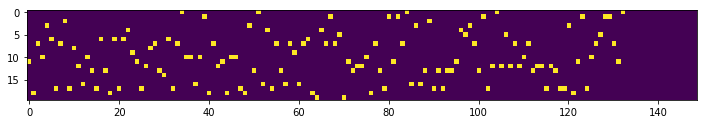

In [12]:
ind = 5000
plt.figure(figsize=(12, 8))
plt.imshow(np.rot90(df_features['aa_one_hot'][ind]))

Split the data into high and low expression

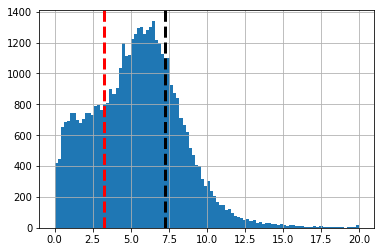

In [13]:
df_features['conc_cf'].hist(bins=100)
plt.axvline(df_features['conc_cf'].quantile(.75), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df_features['conc_cf'].quantile(.25), color='r', linestyle='dashed', linewidth=3)

# Classify as high or low expression

In [14]:
# identify high and low classes by conc_cf quantiles
low_cut = df_features['conc_cf'].quantile(0.25)
high_cut = df_features['conc_cf'].quantile(0.75)

low_exp_df = df_features[df_features['conc_cf'] < low_cut]
high_exp_df = df_features[df_features['conc_cf'] > high_cut]

# set classes for high vs. low expression# set cl 
low_exp_df.insert(0, 'class', 0)
high_exp_df.insert(0, 'class', 1)
#doing it this was causes a warning
# low_exp_df['class'] = 0
# high_exp_df['class'] = 1

print(low_exp_df.shape, high_exp_df.shape)

features_highlow = pd.concat([low_exp_df,high_exp_df])


(11302, 151) (11301, 151)


In [15]:
features_highlow.head()

,class,prest_id,conc_cf,list_comp_A,list_comp_R,list_comp_N,list_comp_D,list_comp_C,list_comp_Q,list_comp_E,...,ss8_bend,ss8_coil,acc_frac,in_gravy,out_gravy,acc_hydrophilic_in,acc_hydrophilic_out,acc_hydrophobic_in,acc_hydrophobic_out,aa_one_hot
1,0,140099,2.91540,0.111111,0.069444,0.027778,0.000000,0.027778,0.020833,0.118056,...,0.013889,0.423611,0.638889,0.378472,-0.747917,0.069444,0.291667,0.263889,0.215278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
2,0,140225,1.48770,0.066176,0.139706,0.110294,0.044118,0.058824,0.044118,0.000000,...,0.117647,0.235294,0.588235,0.360294,-0.994853,0.066176,0.323529,0.323529,0.176471,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,140325,1.50290,0.029197,0.029197,0.094891,0.080292,0.007299,0.043796,0.036496,...,0.021898,0.204380,0.408759,0.595620,-0.551095,0.145985,0.211679,0.408759,0.153285,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,0,140354,0.92003,0.074627,0.097015,0.000000,0.007463,0.022388,0.044776,0.171642,...,0.007463,0.388060,0.671642,0.573881,-1.178358,0.014925,0.402985,0.246269,0.186567,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,0,140500,2.21830,0.035714,0.035714,0.042857,0.035714,0.042857,0.071429,0.085714,...,0.028571,0.607143,0.700000,0.487143,-0.905000,0.042857,0.364286,0.242857,0.178571,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."


In [16]:
features_highlow.to_hdf('features_highlow.h5', 'data')

/Users/prg/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['aa_one_hot']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
